## Library Imports

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd  
import datetime  # Datetime module for handling dates and times
from binance.client import Client 
from sklearn.preprocessing import StandardScaler  # StandardScaler for feature scaling
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  # LinearRegression class from sklearn.linear_mode
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  
import joblib 
import seaborn as sns  
from datetime import datetime  # Import datetime class from datetime
from sklearn.metrics import explained_variance_score  # Explained_variance_score from sklearn.metrics module

## Binance API Setup

In [ ]:
# Define Binance API keys
api_key = ""    # Binance API key
secret_key = ""  # Binance API secret key

# Initialise Binance client
client = Client(api_key, secret_key)

# Fetch candlestick data from Binance
symbol = 'BTCUSDT'  # Symbol for BTC against USDT
interval = Client.KLINE_INTERVAL_15MINUTE  # Interval for candlestick data
limit = 1000  # Number of data points to fetch
dataset = client.get_klines(symbol=symbol, interval=interval, limit=limit)  # Fetch candlestick data

These lines of code set the correct setting to retrieve Bitcoin candlestick data against USDT via the Binance API. It imports critical libraries for data manipulation, analysis, visualisation and machine learning model development, sets up the Binance client with API credentials and retrieves the necessary data.

## Data Processing

In [9]:
# Extract closing prices and timestamps from candlestick data
closing_prices = np.array([float(data[4]) for data in dataset])  # closing prices for 1000 candles
timestamps = np.array([int(data[0]) for data in dataset])  # Timestamps for 1000 candles
time_strings = np.array([datetime.fromtimestamp(timestamp / 1000).strftime('%Y-%m-%d %H:%M:%S') for timestamp in timestamps])  # Convert timestamps to readable form for 1000 candles

# Create a DataFrame for the candlestick chart
df = pd.DataFrame({'Date': time_strings, 'Close': closing_prices})  # Create df with timestamps and closing prices
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format
df.set_index('Date', inplace=True)  # Set 'Date' as index

The closing prices and timestamps are collected from the Binance API's candlestick dataset. The timestamps are then turned into date-time strings that humans can understand. The extracted data is then stored in a pandas DataFrame, which includes columns for the date and closing price. After that, the date column is transformed to datetime format and used as the DataFrame's index.

## Visualisation

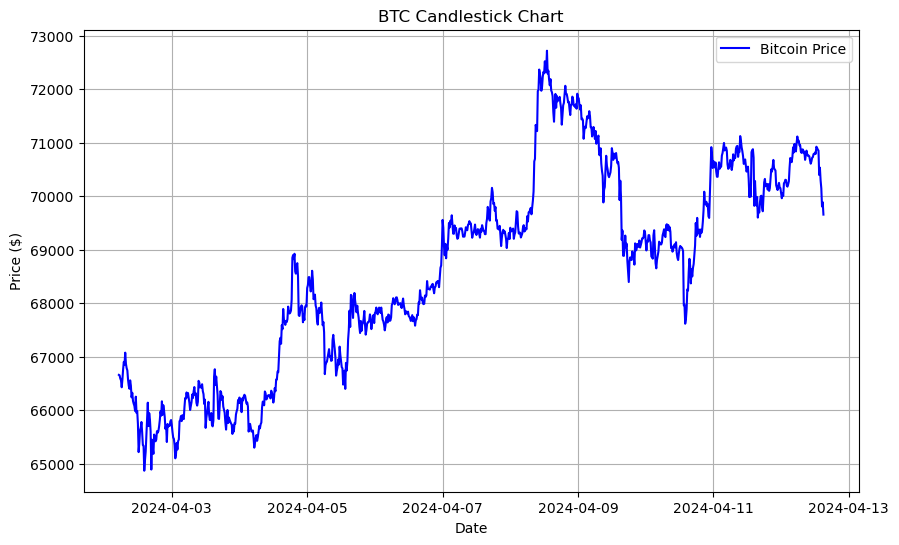

In [10]:
# Plotting the chart
plt.figure(figsize=(10, 6))  
plt.plot(df.index, df['Close'], label='Bitcoin Price', color='blue')  # Closing prices
plt.title('BTC Candlestick Chart')  
plt.xlabel('Date')  
plt.ylabel('Price ($)')  
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display the plot

## Data Preprocessing

In [11]:
# Creating a DataFrame for minute-by-minute price data
price_data = pd.DataFrame({'Time': time_strings, 'Price_BTC': closing_prices})

In [22]:
# Reshape the price array to a column vector
price = closing_prices.reshape(-1, 1) 

scaler = StandardScaler()  # StandardScaler object for standardising the price 

# Fit the scaler on the first 800 candles for training
scaler.fit(price[:800])  

price_standardised = scaler.transform(price)  # Standardising the price using the fitted scaler

# Reshape the standardised price to have 200 rows and 5 columns
price_reshaped = price_standardised.reshape(200, 5)  

# DataFrame with input and target columns for model training
new_columns = ['Scaled_Price_1', 'Scaled_Price_2', 'Scaled_Price_3', 'Scaled_Price_4', 'Target_Price']
df = pd.DataFrame(price_reshaped, columns=new_columns)  

# Printing the DataFrame to visualise the data structure
print(df)  

     Scaled_Price_1  Scaled_Price_2  Scaled_Price_3  Scaled_Price_4  \
0         -0.840313       -0.844879       -0.876419       -0.894696   
1         -0.887532       -0.784573       -0.710407       -0.737364   
2         -0.730115       -0.772842       -0.795563       -0.889139   
3         -0.978644       -0.895005       -0.946732       -1.063795   
4         -1.099997       -1.127679       -1.148569       -1.200056   
..              ...             ...             ...             ...   
195        1.390796        1.354642        1.338904        1.341858   
196        1.293883        1.260964        1.284382        1.320574   
197        1.356765        1.355914        1.371811        1.358900   
198        1.418509        1.401776        1.391206        1.148499   
199        1.094750        1.016129        0.835198        0.877761   

     Target_Price  
0       -0.963689  
1       -0.619327  
2       -0.949111  
3       -1.018577  
4       -1.057339  
..            ...  
195    

The price data preparation for model training is the main objective of the code block above. The price array must be reshaped into a column vector, the data must be standardised using StandardScaler then the standardised price array must be reshaped into a structured DataFrame for further analysis. It also outputs the DataFrame so that the structure and scaled pricing data can be seen.

## Data Spliting

In [13]:
# Split train and test data
train_samples = 150
test_samples = 50

x_train = df.iloc[:train_samples, :-1]  # Features for training 
y_train = df.iloc[:train_samples, -1]   # Target column for training
x_test = df.iloc[train_samples:train_samples + test_samples, :-1]  # Features for testing
y_test = df.iloc[train_samples:train_samples + test_samples, -1]    # Target column for testing

## Model Training and Evaluation

In [14]:
# Define the model
model = LinearRegression()  # Creating a Linear Regression model

# Train the model
model.fit(x_train, y_train)  # Training the model on the training data

# Get predictions from the model
y_pred_scaled = model.predict(x_test)  # Predict scaled values

# Evaluate the model on the test data
y_pred = model.predict(x_test)  # Predict values

# Calculate metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculating Root Mean Squared Error
test_r2 = r2_score(y_test, y_pred)  # Calculating R-squared score

# Print the evaluation metrics
print('Test Score (RMSE): {:.2f}'.format(test_rmse))  # Printing Root Mean Squared Error
print('R-squared: {:.2f}%'.format(test_r2 * 100))  # Printing R-squared score

Test Score (RMSE): 0.08
R-squared: 96.40%


This code builds and trains a linear regression model, makes predictions, assesses the model's performance using metrics like as R-squared and RMSE and outputs the findings.


## Evaluation for Linear Regression

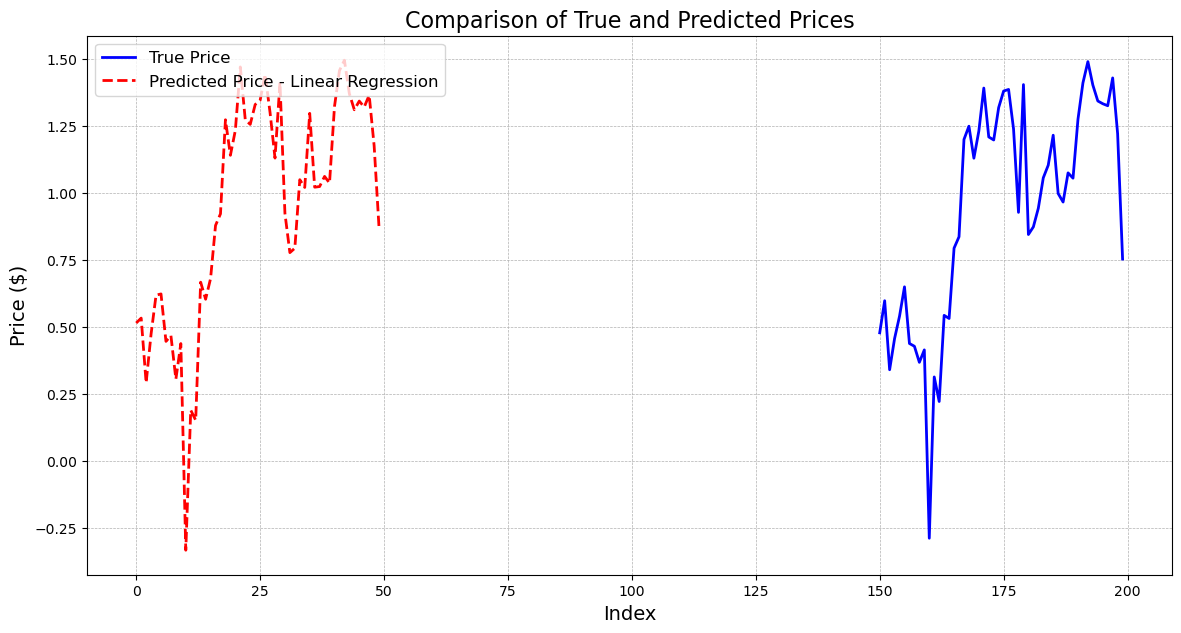

In [15]:
# Plotting the true and predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Price', color='blue', linewidth=2)
plt.plot(y_pred, label='Predicted Price - Linear Regression', color='red', linewidth=2, linestyle='--')
plt.title('Comparison of True and Predicted Prices', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [20]:
# Save the trained Linear Regression model
#joblib.dump(model, "Final_LR.pkl")

['Final_LR.pkl']

# Looking at weight lines for LR.

In [16]:
# Extract the coefficients
coefficients = model.coef_

# Then create a DataFrame
features = df.columns[:-1]  
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

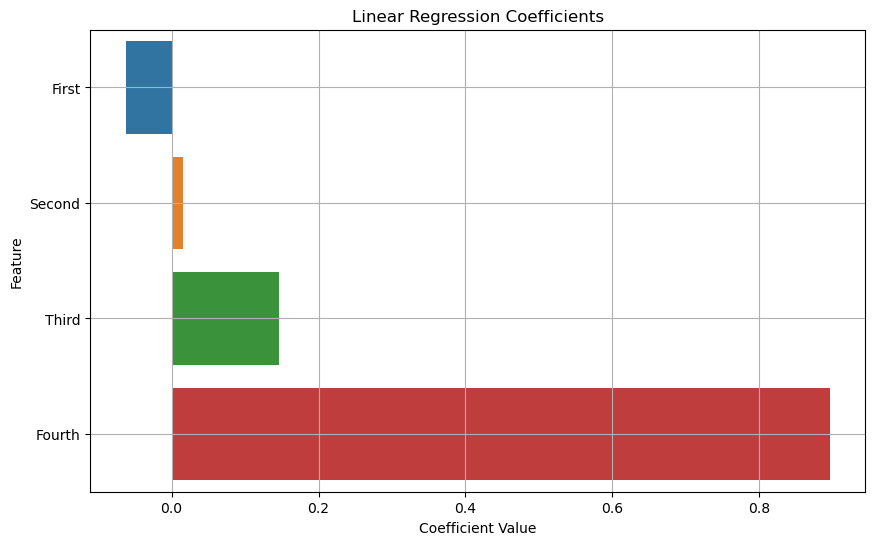

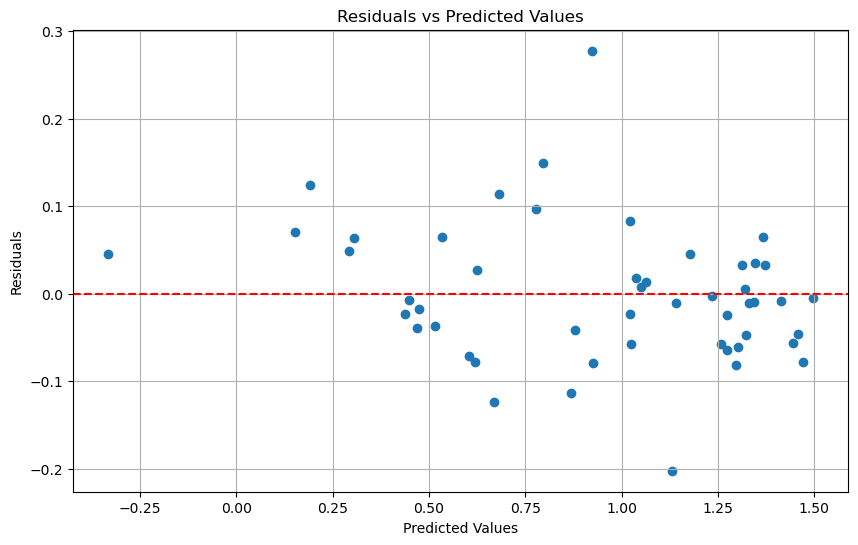

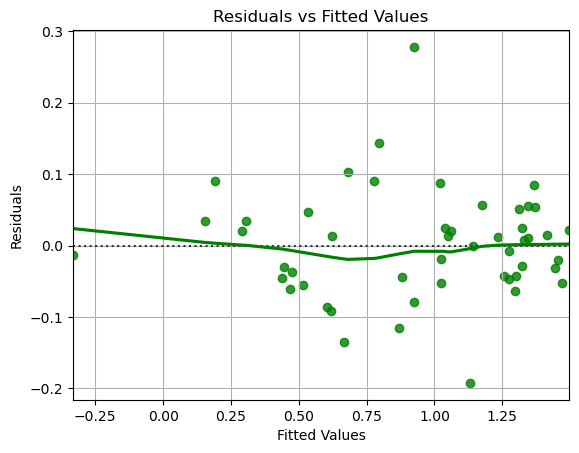

In [17]:
# Coefficients visualisation
coefficients = model.coef_
features = ['First', 'Second', 'Third', 'Fourth']  # Adjust accordingly
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

# Residuals analysis
residuals = y_test - y_pred
if np.isnan(residuals).any():
    print("NaN values found in residuals")
else:
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals)
    plt.title('Residuals vs Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.grid(True)
    plt.show()

    sns.residplot(x=y_pred, y=y_test, lowess=True, color="g")
    plt.title('Residuals vs Fitted Values')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()

This retrieves coefficients from a linear regression model and builds a DataFrame so that the coefficients may be shown graphically as a bar plot. In order to evaluate model performance and spot any problems, it also performs residuals analysis, showing residuals against anticipated and fitted values and looking for NaN values.

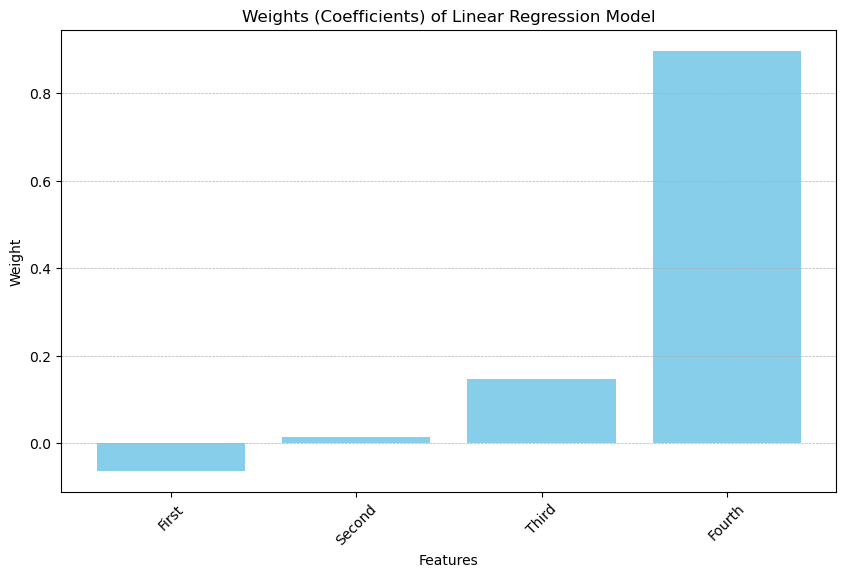

In [21]:
# Plotting the weights (coefficients) of the Linear Regression model
plt.figure(figsize=(10, 6))
plt.bar(x=x_train.columns, height=model.coef_, color='skyblue')
plt.title('Weights (Coefficients) of Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


# Evaluation

In [18]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate additional evaluation metrics for Linear Regression Model
mae_lr = mean_absolute_error(y_test, y_pred_scaled)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_scaled)
explained_variance_lr = explained_variance_score(y_test, y_pred_scaled)

# Print additional evaluation metrics for Linear Regression Model
print('\nAdditional Evaluation Metrics for Linear Regression Model:')
print('Linear Regression Mean Absolute Error (MAE): {:.2f}'.format(mae_lr))
print('Linear Regression Mean Absolute Percentage Error (MAPE): {:.2f}%'.format(mape_lr * 100))
print('Linear Regression Explained Variance Score: {:.2f}'.format(explained_variance_lr))


Additional Evaluation Metrics for Linear Regression Model:
Linear Regression Mean Absolute Error (MAE): 0.06
Linear Regression Mean Absolute Percentage Error (MAPE): 8.13%
Linear Regression Explained Variance Score: 0.96


Define a function that computes the mean absolute percentage error (MAPE) and uses it to assess how well a linear regression model performs. To evaluate the accuracy and prediction capacity of the model, additional evaluation metrics are generated and reported, such as MAE, MAPE and explained variance score.

## References

- Harris, Charles, et al. (2020). *Array programming with NumPy*. Nature, 585(7825), 357-362. [https://doi.org/10.1038/s41586-020-2649-2](https://doi.org/10.1038/s41586-020-2649-2)
- Hunter, John D. (2007). *Matplotlib: A 2D Graphics Environment*. Computing in Science & Engineering, 9(3), 90-95. [https://doi.org/10.1109/MCSE.2007.55](https://doi.org/10.1109/MCSE.2007.55)
- McKinney, Wes. (2010). *Data Structures for Statistical Computing in Python*, Proceedings of the 9th Python in Science Conference, 51-56. [https://conference.scipy.org/proceedings/scipy2010/mckinney.html](https://conference.scipy.org/proceedings/scipy2010/mckinney.html)
- James, Gareth, et al. (2013). *An Introduction to Statistical Learning with Applications in R*. Springer Texts in Statistics. This book covers linear regression extensively and is a cornerstone reference for understanding the theoretical underpinnings of linear models. [http://www-bcf.usc.edu/~gareth/ISL/](http://www-bcf.usc.edu/~gareth/ISL/)
- Pedregosa et al. (2011). *Scikit-learn: Machine Learning in Python*, Journal of Machine Learning Research, 12, 2825-2830. This paper introduces Scikit-learn, discussing its capabilities including linear regression models. [http://jmlr.org/papers/v12/pedregosa11a.html](http://jmlr.org/papers/v12/pedregosa11a.html)
- Seaborn. Michael Waskom et al. (2020). *Seaborn: statistical data visualization*. Journal of Open Source Software, 6(60), 3021. [https://doi.org/10.21105/joss.03021](https://doi.org/10.21105/joss.03021)
- Belsley, David A., Kuh, Edwin & Welsch, Roy E. (1980). *Regression Diagnostics: Identifying Influential Data and Sources of Collinearity*. Wiley Series in Probability and Statistics. This book is fundamental for understanding how to diagnose and solve common problems in regression analysis, such as multicollinearity. [https://www.wiley.com/en-us/Regression+Diagnostics%3A+Identifying+Influential+Data+and+Sources+of+Collinearity-p-9780471691173](https://www.wiley.com/en-us/Regression+Diagnostics%3A+Identifying+Influential+Data+and+Sources+of+Collinearity-p-9780471691173)
- Joblib. *Joblib: running Python functions as pipeline jobs*. [https://joblib.readthedocs.io/en/latest/](https://joblib.readthedocs.io/en/latest/)

